
Arewa Data Science Academy \
Name: Bilqisu Ismail\
Email: ismail.bilkisu@gmail.com\
Title: Week 6 Solution\
Exercises Solution



# 05. PyTorch Going Modular Exercises

Welcome to the 05. PyTorch Going Modular exercise template notebook.

There are several questions in this notebook and it's your goal to answer them by writing Python and PyTorch code.

> **Note:** There may be more than one solution to each of the exercises, don't worry too much about the *exact* right answer. Try to write some code that works first and then improve it if you can.

## Resources and solutions

* These exercises/solutions are based on [section 05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/) of the Learn PyTorch for Deep Learning course by Zero to Mastery.

**Solutions:**

Try to complete the code below *before* looking at these.

* See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/ijgFhMK3pp4).
* See an example [solutions notebook for these exercises on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/05_pytorch_going_modular_exercise_solutions.ipynb).

## 1. Turn the code to get the data (from section 1. Get Data) into a Python script, such as `get_data.py`.

* When you run the script using `python get_data.py` it should check if the data already exists and skip downloading if it does.
* If the data download is successful, you should be able to access the `pizza_steak_sushi` images from the `data` directory.

In [57]:
# YOUR CODE HERE
# 1. Get data
%%writefile get_data.py


import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory exists.")
  raise SystemExit
else:
  print(f"Did not find {image_path} directory, creating...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data (images from GitHub)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping pizza, steak, suhsi data to {image_path}")
  zip_ref.extractall(image_path)



Writing get_data.py


In [58]:
# Example running of get_data.py
!python get_data.py
#!rm -rf data/

data/pizza_steak_sushi directory exists.


[PosixPath('data/pizza_steak_sushi/train/steak/1961025.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/214320.jpg'), PosixPath('data/pizza_steak_sushi/train/steak/2707522.jpg')]
data/pizza_steak_sushi/train/pizza/741883.jpg
pizza
Random image path: data/pizza_steak_sushi/train/pizza/741883.jpg
Image class: pizza
Image height: 512
Image width: 512


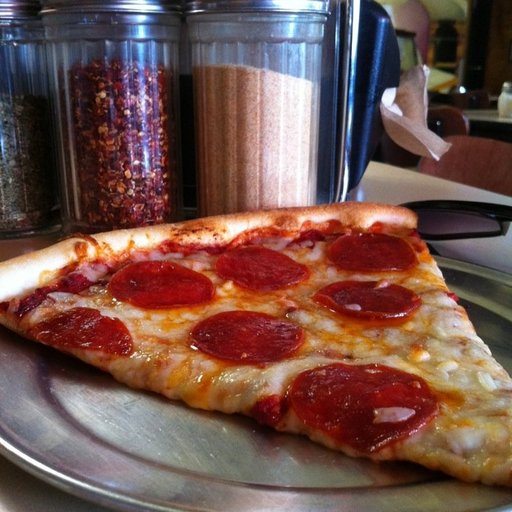

In [59]:
# Visualize an image
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list[:3])

# 2. Get random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [60]:
import requests

# List of filenames
filenames = ["data_setup.py", "engine.py", "model_builder.py", "utils.py"]

# Base URL of the repository
base_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/going_modular/going_modular/"

# Loop through the filenames and download each file
for filename in filenames:
    # Construct the complete URL for the file
    file_url = base_url + filename

    # Make a GET request to download the file
    response = requests.get(file_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Get the content of the file
        file_content = response.text

        # Save the content to a local file

        with open(filename, "w") as file:
            file.write(file_content)

        print(f"File {filename} downloaded successfully.")
    else:
        print(f"Failed to download file {filename}. Status code: {response.status_code}")




File data_setup.py downloaded successfully.
File engine.py downloaded successfully.
File model_builder.py downloaded successfully.
File utils.py downloaded successfully.


In [61]:
# YOUR CODE HERE
%%writefile train.py
"""
Trains a PyTorch image classification model using device-agnostic code.
"""

import os

import torch

from torchvision import transforms

import data_setup, engine, model_builder, utils

import argparse

parser = argparse.ArgumentParser(description='Hyperparameters.')
parser.add_argument('--num_epochs', default=5, type=int, help='number of epochs to train')
parser.add_argument('--batch_size', default=32, type=int, help='batch size')
parser.add_argument('--hidden_units', default=10, type=int, help='number of hidden units')
parser.add_argument('--learning_rate', default=0.001, type=float, help='learning rate')
args = parser.parse_args()

# Setup hyperparameters
NUM_EPOCHS = args.num_epochs
BATCH_SIZE = args.batch_size
HIDDEN_UNITS = args.hidden_units
LEARNING_RATE = args.learning_rate

# Setup directories
train_dir = "data/pizza_steak_sushi/train"
test_dir = "data/pizza_steak_sushi/test"

# Setup target device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create DataLoaders with help from data_setup.py
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transform,
    batch_size=BATCH_SIZE
)

# Create model with help from model_builder.py
model = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

# Set loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Start training with help from engine.py
engine.train(model=model,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

# Save the model with help from utils.py
utils.save_model(model=model,
                 target_dir="models",
                 model_name="05_going_modular_script_mode_tinyvgg_model.pth")

Overwriting train.py


## 2. Use [Python's `argparse` module](https://docs.python.org/3/library/argparse.html) to be able to send the `train.py` custom hyperparameter values for training procedures.
* Add an argument flag for using a different:
  * Training/testing directory
  * Learning rate
  * Batch size
  * Number of epochs to train for
  * Number of hidden units in the TinyVGG model
    * Keep the default values for each of the above arguments as what they already are (as in notebook 05).
* For example, you should be able to run something similar to the following line to train a TinyVGG model with a learning rate of 0.003 and a batch size of 64 for 20 epochs: `python train.py --learning_rate 0.003 batch_size 64 num_epochs 20`.
* **Note:** Since `train.py` leverages the other scripts we created in section 05, such as, `model_builder.py`, `utils.py` and `engine.py`, you'll have to make sure they're available to use too. You can find these in the [`going_modular` folder on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular/going_modular).

In [62]:
# YOUR CODE HERE
%%writefile train.py
"""
Trains a PyTorch image classification model using device-agnostic code.
"""

import os

import torch

from torchvision import transforms

import data_setup, engine, model_builder, utils

import argparse
# Initialize Parser
parser = argparse.ArgumentParser(description='Hyperparameters.')

parser.add_argument('--num_epochs', default=5, type=int, help='number of epochs to train')
parser.add_argument('--batch_size', default=32, type=int, help='batch size')
parser.add_argument('--hidden_units', default=10, type=int, help='number of hidden units')
parser.add_argument('--learning_rate', default=0.001, type=float, help='learning rate')
args = parser.parse_args()

# Setup hyperparameters
NUM_EPOCHS = args.num_epochs
BATCH_SIZE = args.batch_size
HIDDEN_UNITS = args.hidden_units
LEARNING_RATE = args.learning_rate

# Setup directories
train_dir = "data/pizza_steak_sushi/train"
test_dir = "data/pizza_steak_sushi/test"

# Setup target device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create DataLoaders with help from data_setup.py
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transform,
    batch_size=BATCH_SIZE
)

# Create model with help from model_builder.py
model = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

# Set loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Start training with help from engine.py
engine.train(model=model,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

# Save the model with help from utils.py
utils.save_model(model=model,
                 target_dir="models",
                 model_name="05_going_modular_script_mode_tinyvgg_model.pth")

Overwriting train.py


In [63]:
# Example running of train.py
!python train.py --num_epochs 5 --batch_size 128 --hidden_units 128 --learning_rate 0.0003

  0% 0/5 [00:00<?, ?it/s]Epoch: 1 | train_loss: 1.0963 | train_acc: 0.3537 | test_loss: 1.0918 | test_acc: 0.3333
 20% 1/5 [00:01<00:06,  1.56s/it]Epoch: 2 | train_loss: 1.0870 | train_acc: 0.4232 | test_loss: 1.0728 | test_acc: 0.3867
 40% 2/5 [00:02<00:03,  1.31s/it]Epoch: 3 | train_loss: 1.0600 | train_acc: 0.4956 | test_loss: 1.0317 | test_acc: 0.4133
 60% 3/5 [00:03<00:02,  1.23s/it]Epoch: 4 | train_loss: 1.0047 | train_acc: 0.5037 | test_loss: 1.0142 | test_acc: 0.4933
 80% 4/5 [00:04<00:01,  1.20s/it]Epoch: 5 | train_loss: 0.9544 | train_acc: 0.5502 | test_loss: 1.0213 | test_acc: 0.4667
100% 5/5 [00:06<00:00,  1.22s/it]
[INFO] Saving model to: models/05_going_modular_script_mode_tinyvgg_model.pth


## 3. Create a Python script to predict (such as `predict.py`) on a target image given a file path with a saved model.

* For example, you should be able to run the command `python predict.py some_image.jpeg` and have a trained PyTorch model predict on the image and return its prediction.
* To see example prediction code, check out the [predicting on a custom image section in notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function).
* You may also have to write code to load in a trained model.

In [64]:
# YOUR CODE HERE
%%writefile predict.py
import torch
import torchvision
import argparse

import model_builder

#  Parser
parser = argparse.ArgumentParser()

# Get an image path
parser.add_argument("--image",
                    help=" image filepath")

# Get a model path
parser.add_argument("--model_path",
                    default="models/05_going_modular_script_mode_tinyvgg_model.pth",
                    type=str,
                    help="target model to use for prediction filepath")

args = parser.parse_args()

# Class names
class_names = ["pizza", "steak", "sushi"]

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Get the image path
IMG_PATH = args.image


# Function to load in the model
def load_model(filepath=args.model_path):
  # Need to use same hyperparameters as saved model
  model = model_builder.TinyVGG(input_shape=3,
                                hidden_units=128,
                                output_shape=3).to(device)

  print(f"[INFO] Loading in model from: {filepath}")
  # Load in the saved model state dictionary from file
  model.load_state_dict(torch.load(filepath))

  return model

# Function to load in model + predict on select image
def predict_on_image(image_path=IMG_PATH, filepath=args.model_path):
  # Load the model
  model = load_model(filepath)

  # Load in the image and turn it into torch.float32 (same type as model)
  image = torchvision.io.read_image(str(IMG_PATH)).type(torch.float32)

  # Preprocess the image to get it between 0 and 1
  image = image / 255.

  # Resize the image to be the same size as the model
  transform = torchvision.transforms.Resize(size=(64, 64))
  image = transform(image)

 # Predict on image
  model.eval()
  with torch.inference_mode():
    # Put image to target device
    image = image.to(device)

    # Get pred logits
    pred_logits = model(image.unsqueeze(dim=0)) # make sure image has batch dimension (shape: [batch_size, height, width, color_channels])

    # Get pred probs
    pred_prob = torch.softmax(pred_logits, dim=1)

    # Get pred labels
    pred_label = torch.argmax(pred_prob, dim=1)
    pred_label_class = class_names[pred_label]

  print(f"[INFO] Pred class: {pred_label_class}, Pred prob: {pred_prob.max():.3f}")

if __name__ == "__main__":
  predict_on_image()

Overwriting predict.py


In [65]:
# Example running of predict.py
!python predict.py --image data/pizza_steak_sushi/test/sushi/175783.jpg

[INFO] Loading in model from: models/05_going_modular_script_mode_tinyvgg_model.pth
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
[INFO] Pred class: pizza, Pred prob: 0.476
